## Hierarchical Clustering (UPGMA - unweighted pair group method with arithmetic mean)

In [1]:
#Importing the required Libraries

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import random
from matplotlib.pyplot import scatter
import collections
import matplotlib.pyplot as plt

In [12]:
'''
Given a matrix x return the index where the minimum value lies
'''

def find_min_idx(x):
    k = x.argmin()
    ncol = x.shape[1]
    return k//ncol, k%ncol

In [55]:
'''
Update distance matrix based on new cluster found
mat = distance matrix
row = first cluster index
col = second cluster index
'''

def update_mat(mat,row,col):
    mat[row,col]=np.inf
    mat[col,row]=np.inf
    for i in range(len(mat)):
        x = (mat[row,i]+mat[col,i])/2
        mat[row,i],mat[col,i],mat[i,row],mat[i,col]=x,x,x,x
    return mat

In [99]:
'''
cluster = cluster matrix
i = cluster at ith level
row, col = merging two clusters
'''

def update_cluster(cluster,i,row,col):
    c1 = cluster[i,row]
    c2 = cluster[i,col]
    x = min(c1,c2)
    for j in range(len(cluster)):
        if cluster[i,j]==c1 or cluster[i,j]==c2:
            cluster[i,j]=x
    return cluster
        

In [144]:
'''
UPGMA (unweighted pair group method with arithmetic mean) algorithm
data = data whose cluster has to find
cluster =  a matrix of size n*n where ith row is ith cut on dendogram
n = size of data
'''

def UPGMA(data):
    mat = euclidean_distances(data)
    n = len(mat)
    cluster = np.zeros((n,n))
    for j in range(n):
        cluster[n-1,j]=j
        mat[j,j]=np.inf
    row,col = find_min_idx(mat)
    for i in range(n-2,-1,-1):
        mat = update_mat(mat,row,col)
        #print(row,col)
        cluster[i]=cluster[i+1]
        cluster = update_cluster(cluster,i,row,col)
        row,col = find_min_idx(mat)
    return cluster

### Creating Virtual instances of data for better visualization

In [145]:
'''
Creating virtual data
'''
data = np.array([[1,1],[1.5,1.5],[5,5],[3,4],[4,4],[3,3.5]])
data

array([[1. , 1. ],
       [1.5, 1.5],
       [5. , 5. ],
       [3. , 4. ],
       [4. , 4. ],
       [3. , 3.5]])

In [146]:
'''
applying UPGMA algorithm on data 
'''
cluster = UPGMA(data)
cluster

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 2., 2., 2.],
       [0., 0., 2., 3., 3., 3.],
       [0., 0., 2., 3., 4., 3.],
       [0., 1., 2., 3., 4., 3.],
       [0., 1., 2., 3., 4., 5.]])

In [150]:
'''
plot a graph of where each cluster point is shown with different color
cluster = cluster matrix
k = number of cluster to plot
'''

def plot_cluster(cluster,k):
    color = ['b','g','r','y','c','k','m']
    fig = plt.figure(figsize=(3,2))
    ax  = fig.add_subplot(111)
    un = np.unique(cluster[k])
    for i in un:
        lst = []
        col = color[int(i)]
        for j in range(len(data)):
            if cluster[k,j]==i:
                lst.append(data[j])
        lst = pd.DataFrame(lst)
        ax.scatter(lst[0],lst[1],c=col)
    plt.show()

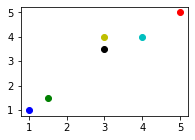

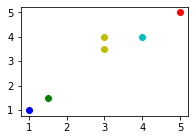

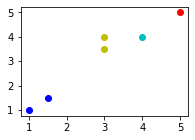

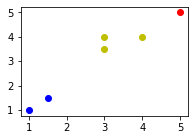

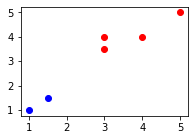

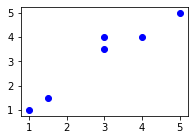

In [151]:
'''
ploting cluster from k= n to k=1
'''
for k in range(len(data)-1,-1,-1):
    plot_cluster(cluster,k)